In [6]:
from DataCleaner import ProcessData
username = 'postgres'
password = '123'
host = 'localhost'
database = 'tel'
table_name = 'xdr_data'

data_processor = ProcessData(username, password, host, database, table_name)
processed_data = data_processor.process_data()

In [8]:
"""The first 10 rows of the dataframe """
processed_data.head(5)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
9,1.304243e+19,4/15/2019 0:32,0.0,4/25/2019 0:40,284.0,864482.0,2.082003e+14,3.365922e+10,3.557311e+13,L20434C,...,16338345.0,6573194.0,12211149.0,974201.0,811355188.0,1591237.0,64856042.0,12815208.0,22417975.0,850570347.0
10,7.277826e+18,4/15/2019 10:30,90.0,4/25/2019 6:14,775.0,848637.0,2.082098e+14,3.366565e+10,3.534681e+13,T29911A,...,2595678.0,19385457.0,16973815.0,9805785.0,565283082.0,9640759.0,95716749.0,14831312.0,56559490.0,594967693.0
11,1.311448e+19,4/15/2019 11:33,626.0,4/25/2019 18:44,542.0,889834.0,2.082019e+14,3.366447e+10,8.600910e+13,T21335C,...,2805710.0,16817598.0,18094847.0,2029991.0,504604946.0,1063672.0,526987098.0,11382619.0,33691738.0,535118044.0
12,1.311448e+19,4/15/2019 12:20,729.0,4/25/2019 8:40,862.0,850766.0,2.082003e+14,3.360329e+10,3.566501e+13,D76026B,...,15567567.0,10610680.0,12189103.0,10621276.0,766292761.0,3655164.0,34550147.0,11326781.0,39654040.0,809144948.0
13,1.304243e+19,4/15/2019 14:58,609.0,4/25/2019 0:40,284.0,812507.0,2.082003e+14,3.365922e+10,3.557311e+13,L20434C,...,16536357.0,21635303.0,18084649.0,9285105.0,530192847.0,10269993.0,235638196.0,2282987.0,48241438.0,576947969.0


In [9]:
#checking for if any null values exists within the data frame
for col in processed_data:
    missing_value_count = processed_data[col].isnull().sum()
    print(f"column '{col}': {missing_value_count} missing value")

column 'Bearer Id': 0 missing value
column 'Start': 0 missing value
column 'Start ms': 0 missing value
column 'End': 0 missing value
column 'End ms': 0 missing value
column 'Dur. (ms)': 0 missing value
column 'IMSI': 0 missing value
column 'MSISDN/Number': 0 missing value
column 'IMEI': 0 missing value
column 'Last Location Name': 0 missing value
column 'Avg RTT DL (ms)': 0 missing value
column 'Avg RTT UL (ms)': 0 missing value
column 'Avg Bearer TP DL (kbps)': 0 missing value
column 'Avg Bearer TP UL (kbps)': 0 missing value
column 'TCP DL Retrans. Vol (Bytes)': 0 missing value
column 'TCP UL Retrans. Vol (Bytes)': 0 missing value
column 'DL TP < 50 Kbps (%)': 0 missing value
column '50 Kbps < DL TP < 250 Kbps (%)': 0 missing value
column '250 Kbps < DL TP < 1 Mbps (%)': 0 missing value
column 'DL TP > 1 Mbps (%)': 0 missing value
column 'UL TP < 10 Kbps (%)': 0 missing value
column '10 Kbps < UL TP < 50 Kbps (%)': 0 missing value
column '50 Kbps < UL TP < 300 Kbps (%)': 0 missing va

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_top10_customer(dataframe):
    # Grouping by 'MSISDN/Number' column and calculating the sum of 'Dur. (ms)'
    grouped = dataframe.groupby('MSISDN/Number')['Dur. (ms)'].sum().reset_index()

    # Getting the top ten categories based on 'Dur. (ms)' values
    top_ten_categories = grouped.nlargest(10, 'Dur. (ms)')

    # Creating the plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x='MSISDN/Number', y='Dur. (ms)', data=top_ten_categories, palette='Set2')
    plt.title('Top Ten Categories based on Dur. (ms) Values')
    plt.xlabel('MSISDN/Number')
    plt.ylabel('Sum of Dur. (ms)')
    plt.xticks(rotation=45) 
    plt.tight_layout()
    plt.show()



In [ ]:
#Univariate anlalysis check for XDR session from Bearer Id attribute
from univariate import univariate_analysis
univariate_analysis(processed_data, 'Bearer Id')

In [ ]:
#Bivariate analysis 

/tmp/ipykernel_17187/3913038314.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MSISDN/Number', y='Bearer Id', data=top_ten_categories, palette='Set2')


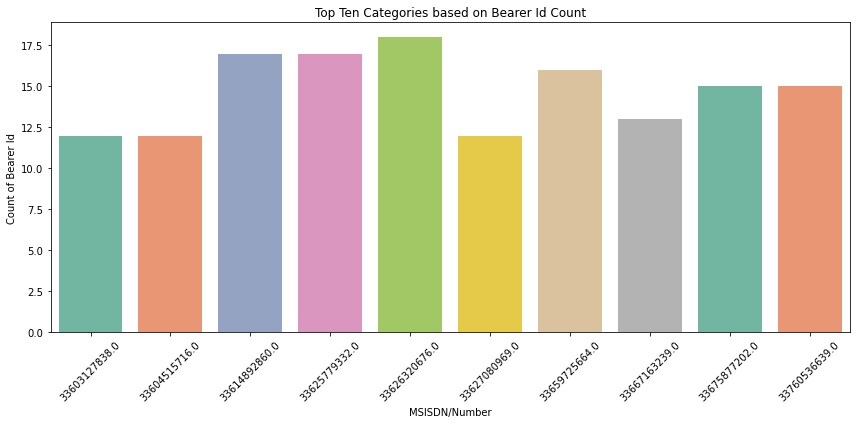

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_top_categories_by_bearer_id(dataframe):
    # Grouping by 'MSISDN/Number' column and counting unique 'Bearer Id' values
    grouped = dataframe.groupby('MSISDN/Number')['Bearer Id'].count().reset_index()

    # Getting the top ten categories based on the count of unique 'Bearer Id'
    top_ten_categories = grouped.nlargest(10, 'Bearer Id')

    # Creating the plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x='MSISDN/Number', y='Bearer Id', data=top_ten_categories, palette='Set2')
    plt.title('Top Ten Categories based on Bearer Id Count')
    plt.xlabel('MSISDN/Number')
    plt.ylabel('No. of_total XDR session')
    plt.xticks(rotation=45) # Rotate x-labels for better readability
    plt.tight_layout()
    plt.show()

plot_top_categories_by_bearer_id(processed_data)

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_top_categories_by_sum_of_columns(dataframe):
    # Creating a new column that holds the sum of 'Total UL (Bytes)' and 'Total DL (Bytes)'
    dataframe['Total_Bytes_Sum'] = dataframe['Total UL (Bytes)'] + dataframe['Total DL (Bytes)']

    # Grouping by 'MSISDN/Number' column and calculating the sum of 'Total_Bytes_Sum'
    grouped = dataframe.groupby('MSISDN/Number')['Total_Bytes_Sum'].sum().reset_index()

    # Getting the top ten categories based on the sum of 'Total_Bytes_Sum'
    top_ten_categories = grouped.nlargest(10, 'Total_Bytes_Sum')

    # Creating the plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x='MSISDN/Number', y='Total_Bytes_Sum', data=top_ten_categories, palette='Set2')
    plt.title('Top Ten Categories based on Sum of Total Bytes')
    plt.xlabel('MSISDN/Number')
    plt.ylabel('Sum of Total Bytes')
    plt.xticks(rotation=45) 
    plt.tight_layout()
    plt.show()


/tmp/ipykernel_17187/3469712740.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MSISDN/Number', y='Total_Bytes_Sum', data=top_ten_categories, palette='Set2')


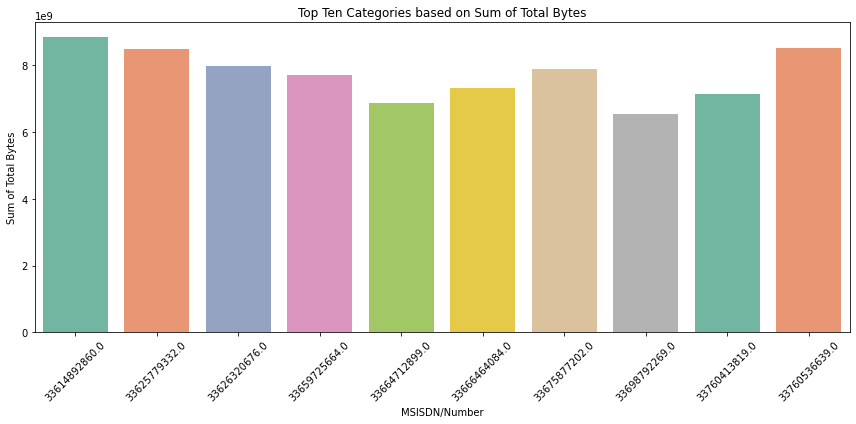

In [16]:
plot_top_categories_by_sum_of_columns(processed_data)

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_top_categories_by_handset_count(dataframe):
    # Counting occurrences of 'Handset Type' across the entire DataFrame
    handset_counts = dataframe['Handset Type'].value_counts()

    # Selecting the top ten categories based on the count of 'Handset Type'
    top_ten_categories = handset_counts.head(10)

    # Creating the plot
    plt.figure(figsize=(12, 6))
    top_ten_categories.plot(kind='bar', color='skyblue')
    plt.title('Top Ten Handset Types based on Count')
    plt.xlabel('Handset Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45) # Rotate x-labels for better readability
    plt.tight_layout()
    plt.show()



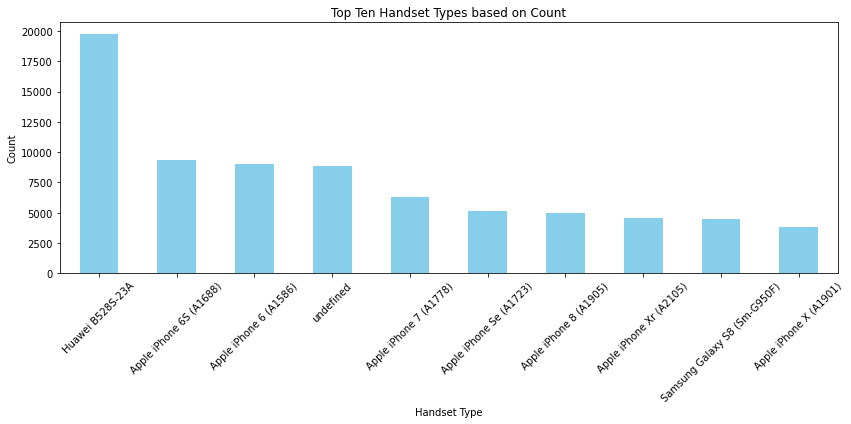

In [27]:
plot_top_categories_by_handset_count(processed_data)

In [35]:
def plot_top_huawei_handsets(dataframe):
    # Filtering data for 'huawei' in 'Handset Type' column
    huawei_data = dataframe[dataframe['Handset Type'].str.contains('huawei', case=False)]

    # Counting occurrences of 'Handset Type' for Huawei
    huawei_counts = huawei_data['Handset Type'].value_counts().head(5)

    # Creating the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=huawei_counts.index, y=huawei_counts.values, palette='viridis')
    plt.title('Top 5 Huawei Handsets')
    plt.xlabel('Handset Model')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_17187/1009878124.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=huawei_counts.index, y=huawei_counts.values, palette='viridis')


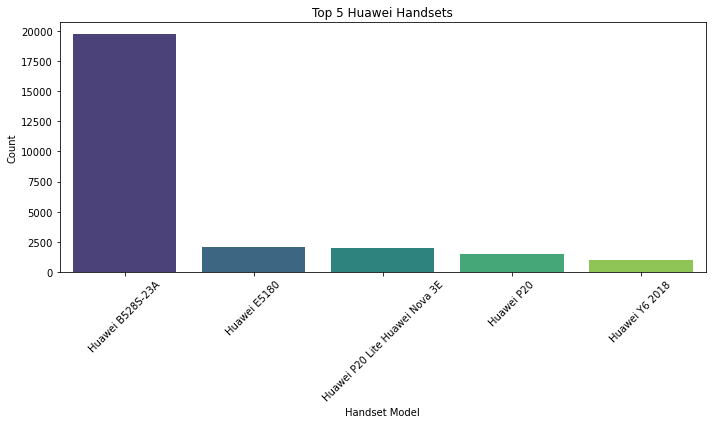

In [36]:
plot_top_huawei_handsets(processed_data)

In [37]:
def plot_top_apple_handsets(dataframe):
    # Filtering data for 'Apple' in 'Handset Type' column
    apple_data = dataframe[dataframe['Handset Type'].str.contains('Apple', case=False)]

    # Counting occurrences of 'Handset Type' for Apple
    apple_counts = apple_data['Handset Type'].value_counts().head(5)

    # Creating the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=apple_counts.index, y=apple_counts.values, palette='muted')
    plt.title('Top 5 Apple Handsets')
    plt.xlabel('Handset Model')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_17187/3688638297.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=apple_counts.index, y=apple_counts.values, palette='muted')


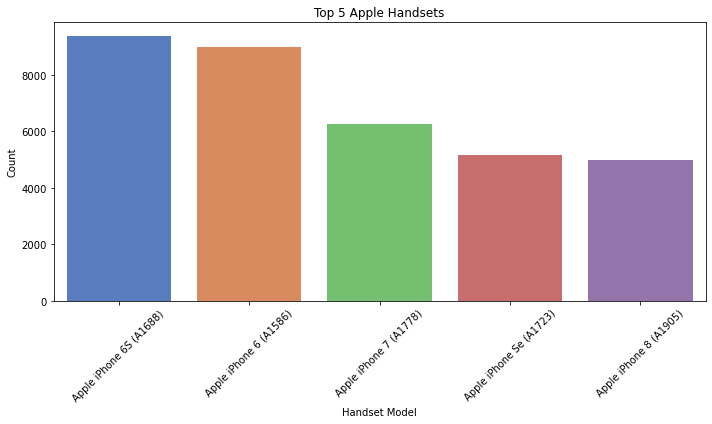

In [38]:
plot_top_apple_handsets(processed_data)

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_average_sum(processed_data, categorical_column, non_categorical_columns):
    # Grouping data by the categorical column and calculating the average of the sum of non-categorical columns
    grouped_data = processed_data.groupby(categorical_column)[non_categorical_columns].sum().mean(axis=1).reset_index()

    # Renaming the columns for better representation in the plot
    grouped_data.columns = [categorical_column, 'Avg Sum']

    # Creating the plot using Seaborn's barplot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=categorical_column, y='Avg Sum', data=grouped_data)
    plt.xlabel(categorical_column)
    plt.ylabel('Average of Sum of Non-Categorical Columns')
    plt.title(f'Average Sum of {", ".join(non_categorical_columns)} by {categorical_column}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Assuming your DataFrame is named 'processed_data'
categorical_column = 'MSISDN/Number'
non_categorical_columns = ['Avg RTT DL (ms)', 'Avg RTT UL (ms)']

# Calling the function to plot the data
plot_average_sum(processed_data, categorical_column, non_categorical_columns)


KeyboardInterrupt: 

In [20]:
processed_data[['Avg RTT DL (ms)','Start']].head(15)

,Avg RTT DL (ms),Start
0,42.0,4/4/2019 12:01
1,65.0,4/9/2019 13:04
2,NaN,4/9/2019 17:42
3,NaN,4/10/2019 0:31
4,NaN,4/12/2019 20:10
5,NaN,4/12/2019 21:37
6,102.0,4/13/2019 8:41
7,39.0,4/14/2019 2:11
8,NaN,4/14/2019 12:48
9,97.0,4/15/2019 0:32


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

class MissingValueFiller:
    def __init__(self, processed_data):
        self.processed_data = processed_data

    def fill_missing_column(self, column_name):
        # Check for missing values in the target column
        if self.processed_data[column_name].isnull().sum() == 0:
            print(f"No missing values found in column '{column_name}'.")
            return self.processed_data
        
        # Remove rows with missing values in the target column
        self.processed_data = self.processed_data.dropna(subset=[column_name])
        
        # Columns to exclude from the model
        exclude_cols = ['Avg RTT UL (ms)', 'MSISDN/Number', 'IMEI', 'TCP DL Retrans. Vol (Bytes)',
                        'TCP UL Retrans. Vol (Bytes)', 'Handset Manufacturer', 'Handset Type',
                        'Bearer Id', 'Start', 'End', 'Last Location Name', column_name]

        # Select columns for training the model
        train_cols = [col for col in self.processed_data.columns if col not in exclude_cols]

        # Separate data into features (X) and target variable (y)
        X = self.processed_data[train_cols]
        y = self.processed_data[column_name]

        # Check if there's enough data to train the model
        if len(X) < 2:
            print(f"Insufficient data to predict missing values for column '{column_name}'.")
            return self.processed_data

        # Initialize the Linear Regression model
        model = LinearRegression()

        # Train the model
        model.fit(X, y)

        # Predict missing values
        missing_data_indices = self.processed_data[self.processed_data[column_name].isnull()].index
        X_missing = self.processed_data.loc[missing_data_indices, train_cols]

        # Fill missing values in the DataFrame
        predicted_values = model.predict(X_missing)
        self.processed_data.loc[missing_data_indices, column_name] = predicted_values
        
        return self.processed_data

    def __call__(self):
        return self.processed_data


In [17]:
# Assuming your DataFrame is named 'processed_data'
filler = MissingValueFiller(processed_data)
column_to_predict = 'Avg RTT DL (ms)'  # Change this to the desired column
filled_data = filler.fill_missing_column(column_to_predict)
processed_data_filled = filler()  # Retrieve the processed data


ValueError: Found array with 0 sample(s) (shape=(0, 41)) while a minimum of 1 is required by LinearRegression.

NameError: name 'processed_data' is not defined